In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('drive/MyDrive/data/data5.csv')
df = pd.DataFrame(data)
X = df[df.columns[~df.columns.isin(['weight','RESILIENCE'])]]
Y = df['RESILIENCE']
x_train, x_test, y_train, y_test = train_test_split(X, Y.astype('float'), test_size=0.20, random_state=53)

In [5]:
tr_regressor = DecisionTreeRegressor(max_depth=10,random_state=53)
tr_regressor.fit(x_train,y_train)
score_train = tr_regressor.score(x_train,y_train) # R-squared
score_test = decision_score = tr_regressor.score(x_test,y_test)
pred_tr = tr_regressor.predict(x_test) #predicting and accuracy
expl_tr = explained_variance_score(pred_tr,y_test) # the accuracy of the decision tree
mse = mean_squared_error(y_test, pred_tr)  # check the accuracy of predicted data by using MSE and RMSE metrics.

In [6]:
print("Decision tree  Regression Model Score on training set is ",score_train)
print("Decision tree  Regression Model Score on testing set is ",score_test)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

Decision tree  Regression Model Score on training set is  0.33068019770381807
Decision tree  Regression Model Score on testing set is  0.1772124642945906
MSE:  0.6552085975563707
RMSE:  0.8094495645538212


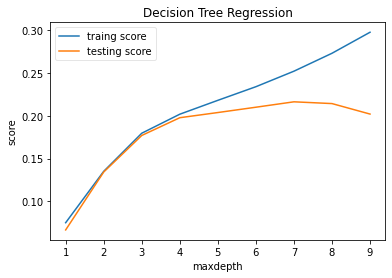

In [7]:
training_scores=[]
testing_scores=[]
depths = 10
for depth in range(1,depths):
    regr = DecisionTreeRegressor(max_depth=depth)
    regr.fit(x_train, y_train)
    training_scores.append(regr.score(x_train,y_train))
    testing_scores.append(regr.score(x_test,y_test))

fig=plt.figure()
depths=np.arange(1,depths)
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score")
ax.plot(depths,testing_scores,label="testing score")
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

Hyperparameter tuning for decision tree regression

Using k-fold cross-validation

In [8]:
tr_regressor = DecisionTreeRegressor()

gs = GridSearchCV(tr_regressor,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 7, 'min_samples_split': 40}
0.6214265779248103


In [ ]:
#The best regressor: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 28, 'min_samples_split': 5} The best score: 0.22262656276481244

In [9]:
model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, min_samples_leaf = 28, min_samples_split = 5, random_state=53)
model.fit(x_train,y_train)
new_score_train = model.score(x_train,y_train) # R-squared
new_score_test = decision_score = model.score(x_test,y_test)
new_pred_tr = model.predict(x_test) #predicting and accuracy
new_expl_tr = explained_variance_score(new_pred_tr,y_test) # the accuracy of the decision tree
new_mse = mean_squared_error(y_test, new_pred_tr)

In [10]:
print("Decision tree  Regression Model Score on training set is ", new_score_train)
print("Decision tree  Regression Model Score on testing set is ", new_score_test)
print("MSE: ", new_mse)
print("RMSE: ", new_mse**(1/2.0)) 

Decision tree  Regression Model Score on training set is  0.24921138717208724
Decision tree  Regression Model Score on testing set is  0.22224829336452834
MSE:  0.6193453143584745
RMSE:  0.7869849517992542


cross validation with $r^2$

In [ ]:
dt = DecisionTreeRegressor(random_state=53, criterion='absolute_error')
dt_fit = dt.fit(x_train, y_train)

dt_scores = cross_val_score(dt_fit, x_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dt_fit.score(x_train, y_train)))

# on the test or hold-out set
from sklearn.metrics import r2_score
print(r2_score(y_test, dt_fit.predict(x_test)))
print(dt_fit.score(x_test, y_test))

In [12]:
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(x_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
#print(result)
r2_score(y_test, g_cv.best_estimator_.predict(x_test))

-0.2580160122682609